In [1]:
import pandas as pd
import numpy as np
from io import BytesIO
import zipfile

In [2]:
zf = zipfile.ZipFile("names.zip", "r")
final_df = pd.DataFrame(columns = ['Name', 'Gender', 'Births', 'Year'])
for i in zf.infolist():
    if(i.filename.endswith('txt')):
        year = i.filename[3:7]
        df = pd.read_csv(BytesIO(zf.read(i.filename)),names = ['Name','Gender', 'Births', 'Year'], encoding='utf-8', engine='python', header=None)
        df['Year'] = int(year)
        final_df = pd.concat([final_df, df])

In [3]:
final_df = final_df.reset_index(drop=True)

Text(0, 0.5, 'Births 1.0 = 1 Million')

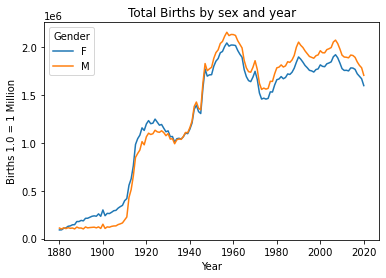

In [4]:
total_births = final_df.pivot_table('Births', index='Year', columns='Gender', aggfunc=sum)
ax = total_births.plot(title='Total Births by sex and year')
ax.set_ylabel("Births 1.0 = 1 Million")

In [5]:

sort_by_name = final_df.sort_values(['Births'], ascending = False)
sort_by_name

,Name,Gender,Births,Year
431069,Linda,F,99693,1947
441440,Linda,F,96212,1948
437172,James,M,94764,1947
544666,Michael,M,92718,1957
437173,Robert,M,91647,1947
...,...,...,...,...
720391,Katrisa,F,5,1971
720392,Katrisha,F,5,1971
720393,Katty,F,5,1971
720394,Katurah,F,5,1971


In [6]:
sort_by_name.head(100)

,Name,Gender,Births,Year
431069,Linda,F,99693,1947
441440,Linda,F,96212,1948
437172,James,M,94764,1947
544666,Michael,M,92718,1957
437173,Robert,M,91647,1947
...,...,...,...,...
478471,Michael,M,72801,1951
604209,James,M,72548,1962
579847,Robert,M,72351,1960
191064,Mary,F,72176,1922
